# Trabalho Prático

Imports

In [1]:
!pip3 install graphviz


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.impute import KNNImputer
from sklearn.tree import export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### Leitura do Arquivo CSV:

In [2]:
data = pd.read_csv('heart2.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Tratamento de dados categóricos

In [3]:

label_data = ['Sex', 'ExerciseAngina', 'Oldpeak', 'RestingECG', 'ST_Slope']

one_hot_data = ['ChestPainType']

lb = LabelEncoder() 


for col in label_data:
    data[col] = lb.fit_transform(data[col])

#Use pandas get_dummies for one-hot encoding
data = pd.get_dummies(data, columns=one_hot_data)

data

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,1,172,0,10,2,0,False,True,False,False
1,49,0,160,180,0,1,156,0,20,1,1,False,False,True,False
2,37,1,130,283,0,2,98,0,10,2,0,False,True,False,False
3,48,0,138,214,0,1,108,1,25,1,1,True,False,False,False
4,54,1,150,195,0,1,122,0,10,2,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,1,132,0,22,1,1,False,False,False,True
914,68,1,144,193,1,1,141,0,42,1,1,True,False,False,False
915,57,1,130,131,0,1,115,1,22,1,1,True,False,False,False
916,57,0,130,236,0,0,174,0,10,1,1,False,True,False,False


### Pre processamento

Knn Imputer

In [4]:
imputer = KNNImputer(missing_values=-1)
imputer.fit_transform(data)



array([[ 40.,   1., 140., ...,   1.,   0.,   0.],
       [ 49.,   0., 160., ...,   0.,   1.,   0.],
       [ 37.,   1., 130., ...,   1.,   0.,   0.],
       ...,
       [ 57.,   1., 130., ...,   0.,   0.,   0.],
       [ 57.,   0., 130., ...,   1.,   0.,   0.],
       [ 38.,   1., 138., ...,   0.,   1.,   0.]])

Normalização dos dados

In [5]:
scaler = MinMaxScaler()
data[label_data] = scaler.fit_transform(data[label_data])

data[label_data].head()

,Sex,ExerciseAngina,Oldpeak,RestingECG,ST_Slope
0,1.0,0.0,0.192308,0.5,1.0
1,0.0,0.0,0.384615,0.5,0.5
2,1.0,0.0,0.192308,1.0,1.0
3,0.0,1.0,0.480769,0.5,0.5
4,1.0,0.0,0.192308,0.5,1.0


### Separar teste e treino

In [6]:

x = data.drop(columns=["HeartDisease"])
y = data["HeartDisease"]

X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 23)



## Árvore de decisão

### Criar modelo

In [8]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)

#Teste do Modelo
prevision = modelo.predict(X_teste)


### Gerar matriz de confusão

c:\Users\Letícia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x0000027BA2E75F50>,
                estimator=DecisionTreeClassifier(criterion='entropy'))

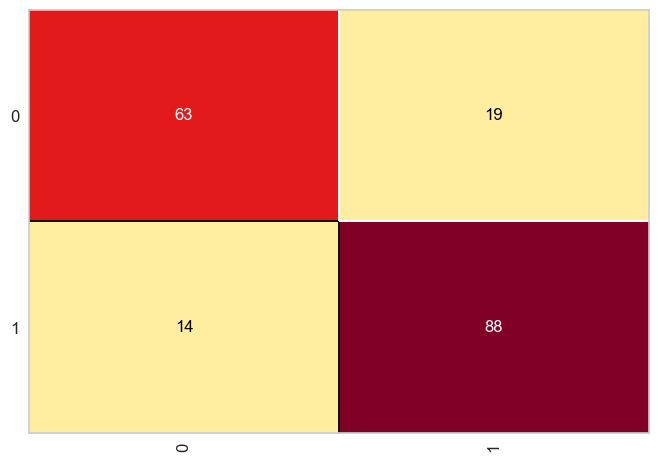

In [9]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, prevision)
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

cm

In [10]:
print(classification_report(y_teste, prevision))
print(accuracy_score(y_teste, prevision))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        82
           1       0.82      0.86      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184

0.8206521739130435


### Plotando a árvore

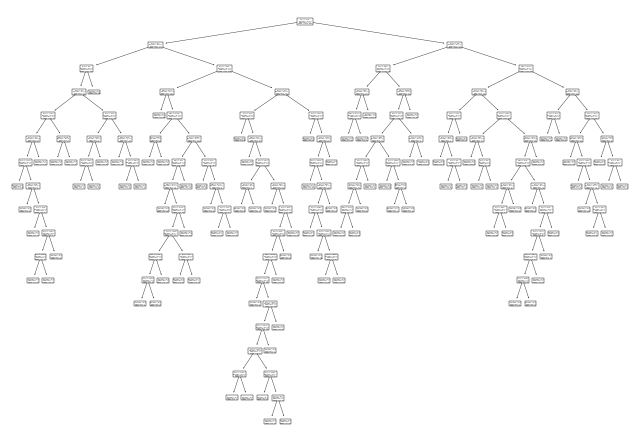

In [11]:
tree.plot_tree(Y)
plt.show()


### Cálculo da cobertura das regras

In [12]:
feature_names = x.columns.tolist()

# Exportar a árvore em formato de texto
tree_rules = export_text(Y, feature_names=feature_names)
print(tree_rules)

# Extrair as regras da árvore
def extrair_regras(arvore, features):
    regras = []
    for node_id in range(arvore.node_count):
        if arvore.children_left[node_id] == arvore.children_right[node_id]:
            # Folha da árvore
            continue
        else:
            regra = (features[arvore.feature[node_id]], arvore.threshold[node_id], node_id)
            regras.append(regra)
    return regras

regras = extrair_regras(Y.tree_, x.columns)

# Calcular a cobertura para cada regra
n_samples = len(x)
coverage = []

for feature, threshold, node_id in regras:
    mask = (x[feature] <= threshold)
    regra_cobertura = mask.sum() / n_samples
    coverage.append(regra_cobertura)

# Imprimir as regras e suas coberturas
for i, (regra, rule_coverage) in enumerate(zip(regras, coverage)):
    feature, threshold, node_id = regra
    print(f"Regra {i + 1}: Se {feature} <= {threshold:.2f} no nó {node_id}")
    print(f"Cobertura: {rule_coverage:.2%}\n")


|--- ST_Slope <= 0.75
|   |--- Sex <= 0.50
|   |   |--- FastingBS <= 0.50
|   |   |   |--- ExerciseAngina <= 0.50
|   |   |   |   |--- RestingBP <= 148.00
|   |   |   |   |   |--- ChestPainType_NAP <= 0.50
|   |   |   |   |   |   |--- MaxHR <= 144.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- MaxHR >  144.00
|   |   |   |   |   |   |   |--- Oldpeak <= 0.25
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Oldpeak >  0.25
|   |   |   |   |   |   |   |   |--- ST_Slope <= 0.25
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- ST_Slope >  0.25
|   |   |   |   |   |   |   |   |   |--- RestingBP <= 125.00
|   |   |   |   |   |   |   |   |   |   |--- Cholesterol <= 276.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Cholesterol >  276.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- RestingB

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

#Definição dos Hiperparâmetros
rf = RandomForestRegressor(random_state=23, n_jobs=-1)

parameters = {
    'n_estimators': [5, 10, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'bootstrap': [True, False],
}

grid = GridSearchCV(rf, parameters, verbose=1, scoring='r2')
grid.fit(X_treino, y_treino)
print('Best Model: ' + str(grid.best_estimator_))


model = RandomForestClassifier(n_estimators=2, max_features='sqrt', random_state = 23, bootstrap = False, max_depth = 50, min_samples_leaf = 3, n_jobs = -1)
model.fit(X_treino, y_treino)
prevision2 = model.predict(X_teste)


Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Model: RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_leaf=3, min_samples_split=5, n_estimators=50,
                      n_jobs=-1, random_state=23)


c:\Users\Letícia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x0000027BA2E75F50>,
                estimator=DecisionTreeClassifier(criterion='entropy'))

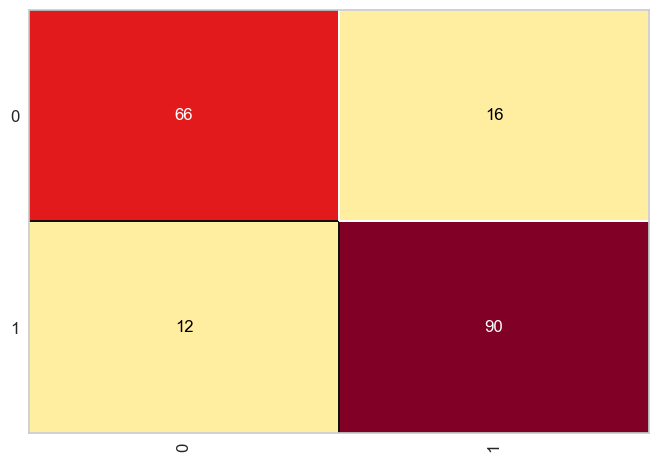

In [14]:
confusion_matrix(y_teste, prevision2)
cm2 = ConfusionMatrix(model)
cm2.fit(X_treino, y_treino)
cm2.score(X_teste, y_teste)

cm

In [15]:
print(classification_report(y_teste, prevision2))
print(accuracy_score(y_teste, prevision2))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        82
           1       0.85      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184

0.8478260869565217


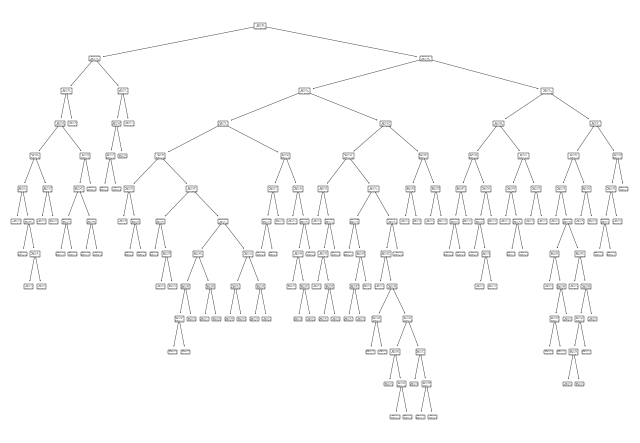

|--- Cholesterol <= 42.00
|   |--- RestingBP <= 151.00
|   |   |--- ChestPainType_ATA <= 0.50
|   |   |   |--- ST_Slope <= 0.75
|   |   |   |   |--- Age <= 62.50
|   |   |   |   |   |--- ExerciseAngina <= 0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- ExerciseAngina >  0.50
|   |   |   |   |   |   |--- Oldpeak <= 0.55
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Oldpeak >  0.55
|   |   |   |   |   |   |   |--- ST_Slope <= 0.25
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- ST_Slope >  0.25
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Age >  62.50
|   |   |   |   |   |--- MaxHR <= 137.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- MaxHR >  137.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- ST_Slope >  0.75
|   |   |   |   |--- ChestPainType_NAP <= 0.50
|   |   |   |   |   |--- Oldpeak <= 0.20
|   |   |   |   |   |   |--- Age <= 50.50
|   |   |   

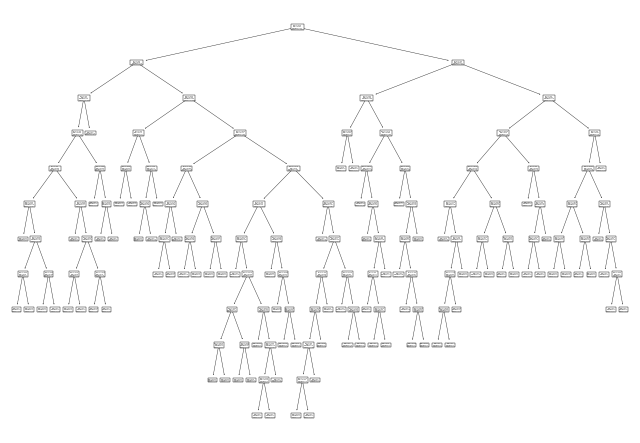

|--- ST_Slope <= 0.75
|   |--- Sex <= 0.50
|   |   |--- FastingBS <= 0.50
|   |   |   |--- ChestPainType_NAP <= 0.50
|   |   |   |   |--- ExerciseAngina <= 0.50
|   |   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Age >  43.50
|   |   |   |   |   |   |--- RestingECG <= 0.25
|   |   |   |   |   |   |   |--- Age <= 56.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Age >  56.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- RestingECG >  0.25
|   |   |   |   |   |   |   |--- Age <= 56.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Age >  56.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- ExerciseAngina >  0.50
|   |   |   |   |   |--- RestingECG <= 0.25
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- RestingECG >  0.25
|   |   |   |   |   |   |--- Cholesterol <= 234.00
|   |   |   |   |   |   |   

In [16]:

for decision_tree in model.estimators_:
   tree.plot_tree(decision_tree)
   plt.show() 

   # Exporte a árvore em formato de texto
   tree_rules = export_text(decision_tree, feature_names=feature_names)
   print(tree_rules)

   # Extrair as regras da árvore
   def extrair_regras(arvore, features):
      regras = []
      for node_id in range(arvore.node_count):
         if arvore.children_left[node_id] == arvore.children_right[node_id]:
               # Folha da árvore
               continue
         else:
               regra = (features[arvore.feature[node_id]], arvore.threshold[node_id], node_id)
               regras.append(regra)
      return regras

   regras = extrair_regras(decision_tree.tree_, x.columns)

   # Calcular a cobertura para cada regra
   n_samples = len(x)
   coverage = []

   for feature, threshold, node_id in regras:
      mask = (x[feature] <= threshold)
      regra_cobertura = mask.sum() / n_samples
      coverage.append(regra_cobertura)

   # Imprimir as regras e suas coberturas
   for i, (regra, rule_coverage) in enumerate(zip(regras, coverage)):
      feature, threshold, node_id = regra
      print(f"Regra {i + 1}: Se {feature} <= {threshold:.2f} no nó {node_id}")
      print(f"Cobertura: {rule_coverage:.2%}\n")


   

## Naive Bayes

In [10]:
model = GaussianNB()
naive = model.fit(X_treino, y_treino)

y_pred = model.predict(X_teste)
accuracy = accuracy_score(y_pred, y_teste)

print(classification_report(y_teste, y_pred))
print(accuracy_score(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        82
           1       0.84      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184

0.8478260869565217


Variância explicada por cada CP: [0.92404197 0.05029419]
Variância acumulativa explicada: [0.92404197 0.97433616]


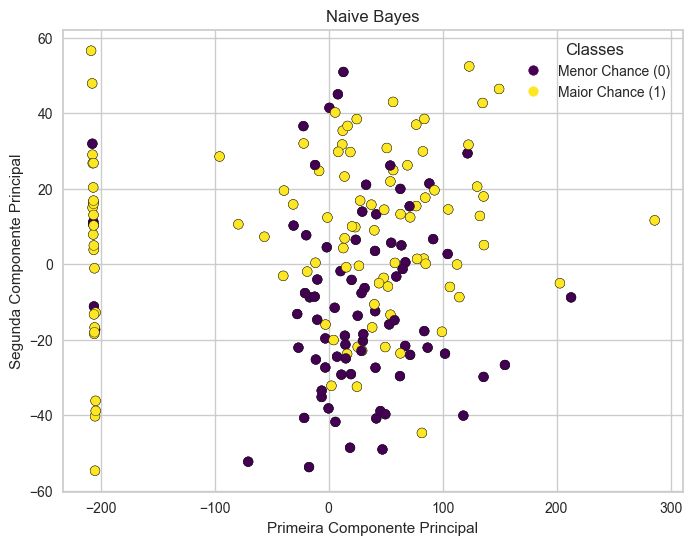

In [18]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_teste)

# Obtém a variância explicada pelos componentes principais
explained_variance = pca.explained_variance_ratio_
print("Variância explicada por cada CP:", explained_variance)
cumulative_explained_variance = explained_variance.cumsum()
print("Variância acumulativa explicada:", cumulative_explained_variance)

# Plotagem das previsões
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_teste, cmap='viridis', edgecolor='k')
plt.title('Naive Bayes')

# Legenda
classes = sorted(set(y_teste))
legend_labels = ['Menor Chance (0)', 'Maior Chance (1)']
sc = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_teste, cmap='viridis', edgecolor='k')
plt.legend(handles=sc.legend_elements()[0], labels=legend_labels, title='Classes')

# Eixos
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')

plt.show()

## Gradient Boosting

In [12]:
from xgboost import XGBClassifier

# Criando o modelo XGBoost
model = XGBClassifier()
model.fit(X_treino, y_treino) 
y_pred = model.predict(X_teste)

# Avaliando o desempenho do modelo
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))
print("Acurácia:", accuracy_score(y_teste, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82        82
           1       0.83      0.93      0.88       102

    accuracy                           0.85       184
   macro avg       0.86      0.84      0.85       184
weighted avg       0.86      0.85      0.85       184

Acurácia: 0.8532608695652174


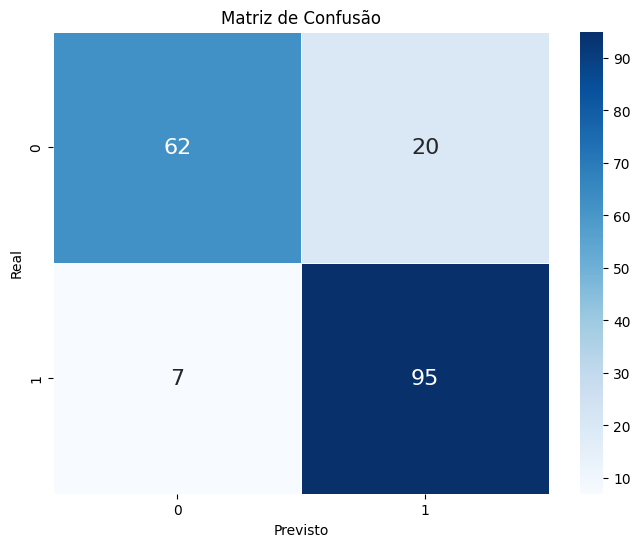

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de Confusão
cm = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

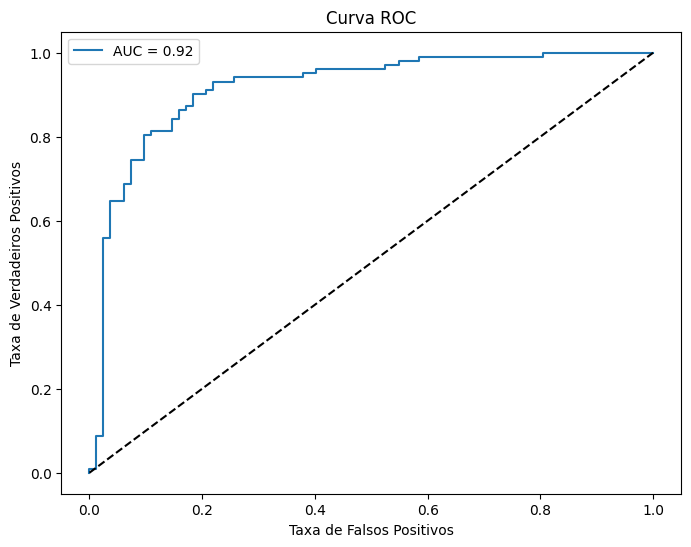

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_teste)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_prob)

# AUC
auc = roc_auc_score(y_teste, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

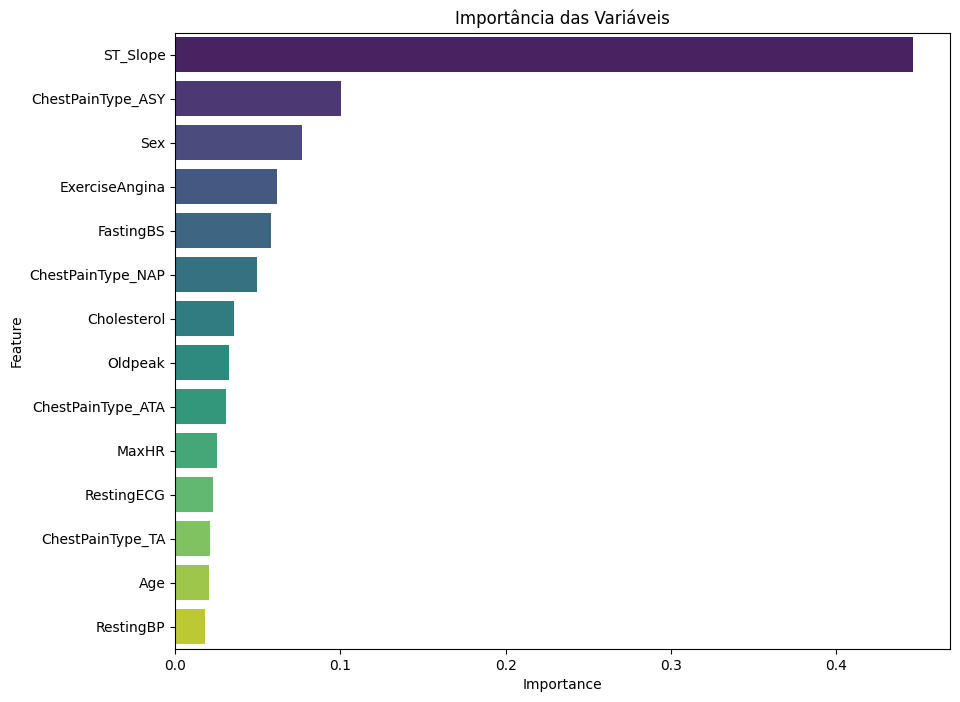

In [15]:
# Importância das variáveis
feature_importance = model.feature_importances_

feature_df = pd.DataFrame({'Feature': X_treino.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Importância das Variáveis')
plt.show()